In [54]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import numpy.ma as ma

#### Problem 2 (Morbidelli 5.7)

Consider the first-order PDE:

$$z\frac{\partial z}{\partial x} + \frac{\partial z}{\partial y} = 0, \text{       } -\infty < x < +\infty, \ y>0 $$ <br>

along with the IC

$$x = \xi, y = 0, z = \Phi(\xi), \text{with      } -\infty < \xi < +\infty $$

Plot the characteristic curves on the (x, y) plane and find the solution z(x,y)

**Hint**: Assume some function form of $\Phi$ to show final solution

Write out the characteristic curves of the equation:

$$\frac{dx}{ds} = P(z, x, y) = z $$ <br>

$$\frac{dy}{ds} = Q(x, z, y) = 1 $$ <br>

$$\frac{dz}{ds} = R(z, x, y) = 0 $$

Integrating the last two gives

$$ y = s + c_2$$ <br>
$$ z = c_3 $$

Plugging in the IC gives

$$ c_2 = 0, y = s$$ <br>
$$ z = c_3 = \Phi(\xi)$$

Using these two to solve the last differential equation gives

$$ \xi = c_1, x = \Phi(\xi)s + \xi = zy + \xi$$

Plotting the characteristic curves as a function of $\xi$ looks something like this. Given that we don't know the form of $\Phi$, we don't quite know:

$$y = \frac{1}{\Phi(\xi)}x - \frac{\xi}{\Phi(\xi)}$$

But let's assume the functional form is:

$$ \Phi = 4 \xi + 3$$

Text(0, 0.5, 'y')

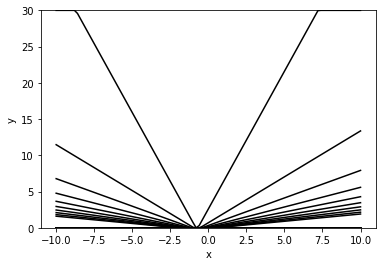

In [61]:
xis = np.array([-0.66, -0.6, -0.5, 0.5])
xis = np.linspace(-2, 0.5, 20)

xn = np.linspace(-10, 10, 101)

fig, ax = plt.subplots()
for xi in xis:
    phi = 4*xi+ 3
    yn = (1/phi)*xn - (xi/phi)
    yn[yn>30] = 30
    yn[yn<0] = 0
    ax.plot(xn, yn, label=np.round(x,2), c='k')
#ax.legend()
ax.set_ylim(0, 30)
ax.set_xlabel('x')
ax.set_ylabel('y')

Solving for $\xi$ and plugging into our equation for x gives:

$$z = \Phi(x - yz) $$

Simplifying with our given form of $\Phi$ gives:

$$z = \frac{4x+3}{4y+1} $$

This is an implicit equation, but there isn't really a way to solve for z, unless we know the function form of $\Phi$.

(-20, 20)

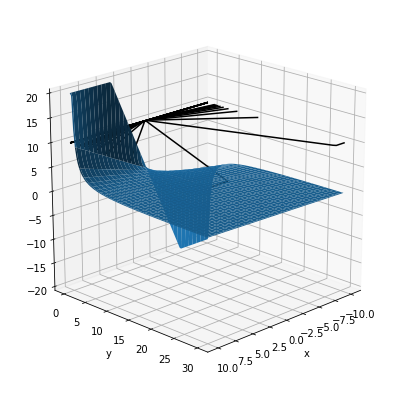

In [65]:
d = 101
x = np.linspace(-10.1, 10, d)
y = np.linspace(0, 30, d)

xv, yv = np.meshgrid(x, y)
z = (4*xv + 3)/(1 + 4*yv)
z = np.clip(z, -20, 20)
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xv, yv, z)

for xi in xis:
    phi = 4*xi+ 3
    yn = (1/phi)*xn - (xi/phi)
    yn[yn>30] = 30
    yn[yn<0] = 0
    ax.plot(xn, yn, zs=10, zdir='z', c='k')
# for x, ph in zip(xi, phi):
#     ax.plot((1/ph)*xn - (x/ph), xn, zs=10, zdir='z', c='k')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.view_init(elev=20, azim=45)
ax.set_zlim([-20, 20])
#ax.set_ylim([0, 2])
#ax.set_xlim(0, 1)